In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [5]:
from torchvision import datasets , transforms
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [6]:
trainset = datasets.MNIST('MNIST_data/' , download = True , train = True , transform = transforms)

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset , batch_size = 64 , shuffle = True)

In [ ]:
trainloader

In [3]:
import numpy as np
import torchvision

In [119]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('MNIST_data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,0.5,0.5),(0.5,0.5,0.5))
                             ])),
   batch_size = 64,shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('MNIST_data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,0.5,0.5),(0.5,0.5,0.5))
                             ])),
   batch_size = 1000 , shuffle=True)

In [95]:
dataiter = enumerate(train_loader)
batch_idx, (images , labels) = next(dataiter)

In [96]:
images.shape

torch.Size([64, 1, 28, 28])

In [34]:
images[1].numpy().reshape(28,28)

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

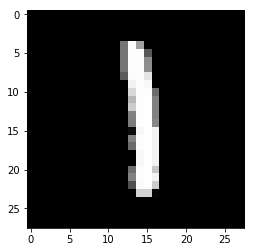

In [36]:
plt.imshow(images[0].numpy().reshape(28,28) , cmap = 'Greys_r')

In [37]:
#creating neural network
n_input = 784
n_hidden = 256
n_output = 10

wh = torch.randn(n_input , n_hidden)
wo = torch.randn(n_hidden , n_output)

bh = torch.randn(1 , n_hidden)
bo = torch.randn(1 , n_output)

In [39]:
def activation(z):
    return 1/(1 + torch.exp(-z))

In [40]:
flattened = images.view(images.shape[0] , -1)
#-1 sees and puts appropriate number of elements into it

In [47]:
hidden_output = activation(torch.mm(flattened , wh) + bh)
outputs = torch.mm(hidden_output , wo) + bo

In [45]:
outputs[0]
# we should instead be using doftmax since its a multiclass classification

tensor([1.0000e+00, 9.9528e-01, 9.8606e-05, 2.7520e-06, 1.0000e+00, 1.4682e-04,
        9.9997e-01, 1.3182e-06, 8.7700e-01, 1.6161e-03])

In [46]:
def softmax(z):
    return torch.exp(-z)/torch.sum(torch.exp(-z) , dim=1).view(-1,1)

In [51]:
softmax(outputs).sum(dim = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

In [52]:
import torch.nn as nn

In [60]:
import torch.nn.functional as F

In [64]:
class Neural_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(n_input , n_hidden)
        self.output = nn.Linear(n_hidden , n_output)
        
    def forward(self , x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x) , dim = 1)
        return x

In [65]:
model = Neural_net()

In [66]:
model

Neural_net(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [72]:
class robust_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784 , 128)
        self.hidden2 = nn.Linear(128 , 64)
        self.output = nn.Linear(64 , 10)

    def forward(self , x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x))
        return x

In [73]:
model = robust_nn()
model

robust_nn(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [75]:
dir(torch.nn
   )

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Fold',
 'FractionalMaxPool2d',
 'GLU',
 'GRU',
 'GRUCell',
 'GroupNorm',
 'Hardshrink',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'InstanceNorm1d',
 'InstanceNorm2d',
 'InstanceNorm3d',
 'KLDivLoss',
 'L1Loss',
 'LPPool1d',
 'LPPool2d',
 'LSTM',
 'LSTMCell',
 'LayerNorm',
 'LeakyReLU',
 'Linear',
 '

In [111]:
model = nn.Sequential(nn.Linear(784 , 128) , nn.ReLU() , 
                     nn.Linear(128 , 64) , nn.ReLU() , 
                     nn.Linear(64 , 10) , nn.Softmax(dim=1))
criterion = nn.CrossEntropyLoss()
logits = model(flattened)
loss = criterion(logits , labels)
print(loss)
logits.shape , labels.shape

tensor(2.3010, grad_fn=<NllLossBackward>)


(torch.Size([64, 10]), torch.Size([64]))

In [78]:
x = torch.randn(2 , 2 , requires_grad = True)
y = x**2
print(y)

tensor([[0.0963, 1.0643],
        [0.0030, 0.0011]], grad_fn=<PowBackward0>)


In [79]:
y.grad_fn

In [80]:
z = y.mean()

In [82]:
print(x.grad)

None


In [83]:
z.backward()

In [84]:
x.grad , x/2

(tensor([[ 0.1551, -0.5158],
         [-0.0272,  0.0166]]), tensor([[ 0.1551, -0.5158],
         [-0.0272,  0.0166]], grad_fn=<DivBackward0>))

In [85]:
print('before back propagation ' , model[0].weight.grad)
loss.backward()
print('after back propagation' , model[0].weight.grad)

before back propagation  None
after back propagation tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.8207e-04, -2.8207e-04, -2.8207e-04,  ..., -2.8207e-04,
         -2.8207e-04, -2.8207e-04],
        [-6.6660e-06, -6.6660e-06, -6.6660e-06,  ..., -6.6660e-06,
         -6.6660e-06, -6.6660e-06],
        ...,
        [ 5.5464e-06,  5.5464e-06,  5.5464e-06,  ...,  5.5464e-06,
          5.5464e-06,  5.5464e-06],
        [ 5.3688e-05,  5.3688e-05,  5.3688e-05,  ...,  5.3688e-05,
          5.3688e-05,  5.3688e-05],
        [-7.7261e-05, -7.7261e-05, -7.7261e-05,  ..., -7.7261e-05,
         -7.7261e-05, -7.7261e-05]])


In [86]:
from torch import optim

In [87]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [88]:
optimizer = optim.Adam(model.parameters() , lr = 0.01)

In [90]:
optimizer.zero_grad()
output = model(flattened)
loss = criterion(output , labels)
loss.backward()
print(model[0].weight.grad)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.8207e-04, -2.8207e-04, -2.8207e-04,  ..., -2.8207e-04,
         -2.8207e-04, -2.8207e-04],
        [-6.6660e-06, -6.6660e-06, -6.6660e-06,  ..., -6.6660e-06,
         -6.6660e-06, -6.6660e-06],
        ...,
        [ 5.5464e-06,  5.5464e-06,  5.5464e-06,  ...,  5.5464e-06,
          5.5464e-06,  5.5464e-06],
        [ 5.3688e-05,  5.3688e-05,  5.3688e-05,  ...,  5.3688e-05,
          5.3688e-05,  5.3688e-05],
        [-7.7261e-05, -7.7261e-05, -7.7261e-05,  ..., -7.7261e-05,
         -7.7261e-05, -7.7261e-05]])


In [92]:
optimizer.step()
model[0].weight.grad

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.8207e-04, -2.8207e-04, -2.8207e-04,  ..., -2.8207e-04,
         -2.8207e-04, -2.8207e-04],
        [-6.6660e-06, -6.6660e-06, -6.6660e-06,  ..., -6.6660e-06,
         -6.6660e-06, -6.6660e-06],
        ...,
        [ 5.5464e-06,  5.5464e-06,  5.5464e-06,  ...,  5.5464e-06,
          5.5464e-06,  5.5464e-06],
        [ 5.3688e-05,  5.3688e-05,  5.3688e-05,  ...,  5.3688e-05,
          5.3688e-05,  5.3688e-05],
        [-7.7261e-05, -7.7261e-05, -7.7261e-05,  ..., -7.7261e-05,
         -7.7261e-05, -7.7261e-05]])

In [103]:
images[0].shape , labels.shape

(torch.Size([1, 28, 28]), torch.Size([64]))

In [121]:
for epoch in range(10):
    run_loss = 0
    for i in range(len(images)):
        image = images[i]
        label = labels[i]
        image = image.view(1 , 784)
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output , label.view(1))
        loss.backward()
        optimizer.step()
        run_loss += loss.item()
    print('epoch ' , epoch+1 , ': ' , run_loss)

epoch  1 :  147.2189404964447
epoch  2 :  147.2189404964447
epoch  3 :  147.2189404964447
epoch  4 :  147.2189404964447
epoch  5 :  147.2189404964447
epoch  6 :  147.2189404964447
epoch  7 :  147.2189404964447
epoch  8 :  147.2189404964447
epoch  9 :  147.2189404964447
epoch  10 :  147.2189404964447


In [118]:
for epoch in range(10):
    image = images.view(images.shape[0] , -1)
    optimizer.zero_grad()

    output = model.forward(image)
    loss = criterion(output , labels)
    loss.backward()
    optimizer.step()
    print('epoch ' , epoch+1 , ': ' , loss.item())

epoch  1 :  2.3002965450286865
epoch  2 :  2.3002965450286865
epoch  3 :  2.3002965450286865
epoch  4 :  2.3002965450286865
epoch  5 :  2.3002965450286865
epoch  6 :  2.3002965450286865
epoch  7 :  2.3002965450286865
epoch  8 :  2.3002965450286865
epoch  9 :  2.3002965450286865
epoch  10 :  2.3002965450286865
